In [4]:
#importing the libaries
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('Bitcoin.csv')
df2 = pd.read_csv('ethereum.csv')

In [6]:
df

,Date,Open,High,Low,Close,Volume,Currency
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,USD
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,USD
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,USD
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,USD
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,USD
...,...,...,...,...,...,...,...
1146,2022-08-18,23331.542969,23567.285156,23152.455078,23222.242188,4546110.0,USD
1147,2022-08-19,23219.097656,23219.097656,20898.304688,20902.404297,13856579.0,USD
1148,2022-08-20,20899.923828,21344.845703,20864.435547,21153.019531,7139073.0,USD
1149,2022-08-21,21153.412109,21695.794922,21125.320312,21561.177734,6657571.0,USD


In [7]:
df2

,date,Open,High,Low,Close,price,Currency
0,3/10/2016,11.20,11.85,11.07,11.75,4,USD
1,3/11/2016,11.75,11.95,11.75,11.95,179,USD
2,3/12/2016,11.95,13.45,11.95,12.92,833,USD
3,3/13/2016,12.92,15.07,12.92,15.07,1295,USD
4,3/14/2016,15.07,15.07,11.40,12.50,92183,USD
...,...,...,...,...,...,...,...
2353,8/19/2022,1846.52,1846.97,1607.60,1609.48,1594321,USD
2354,8/20/2022,1609.01,1654.84,1525.51,1575.60,1007240,USD
2355,8/21/2022,1575.61,1644.88,1563.92,1618.25,852071,USD
2356,8/22/2022,1618.21,1627.13,1531.91,1626.75,1044290,USD


In [8]:
#Check for missing values and implement appropriate strategies (e.g., imputation, removal) to handle them.
df.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [9]:
df2.isnull().sum()

date        0
Open        0
High        0
Low         0
Close       0
price       0
Currency    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df2.duplicated().sum()

np.int64(0)

In [12]:
#using heatmap to check for missing values
import seaborn as sns
import matplotlib.pyplot as plt

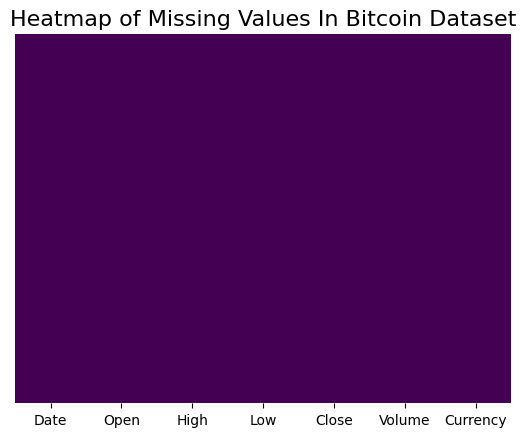

In [13]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values In Bitcoin Dataset", fontsize=16)
plt.show()

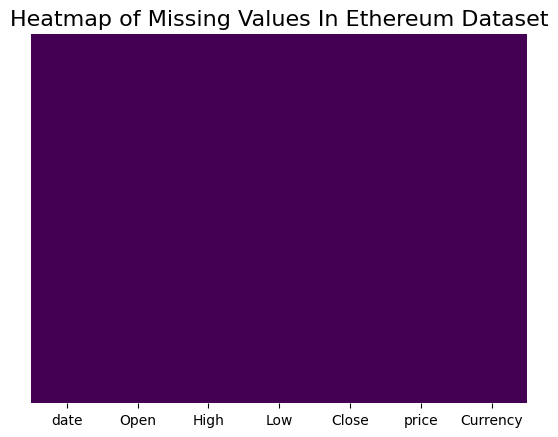

In [14]:
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values In Ethereum Dataset", fontsize=16)
plt.show()

In [15]:
print('There are no missing values in the heat map, a missing value would have showed up as red or yellow, therefore the dataset is clean')

There are no missing values in the heat map, a missing value would have showed up as red or yellow, therefore the dataset is clean


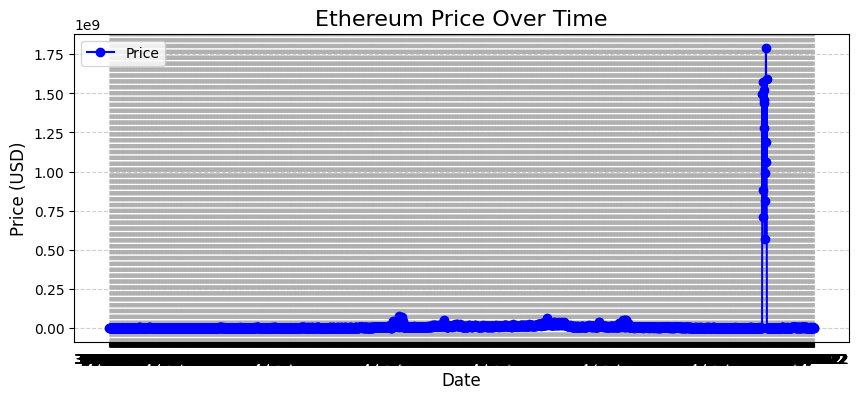

In [16]:
#Visualize the price data over time series to identify trends, seasonality, and potential outliers 
#graph of ethereum closing price over time 
plt.figure(figsize=(10,4))
plt.plot(df2['date'], df2['price'], label='Price', color='blue', marker='o')
plt.title("Ethereum Price Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

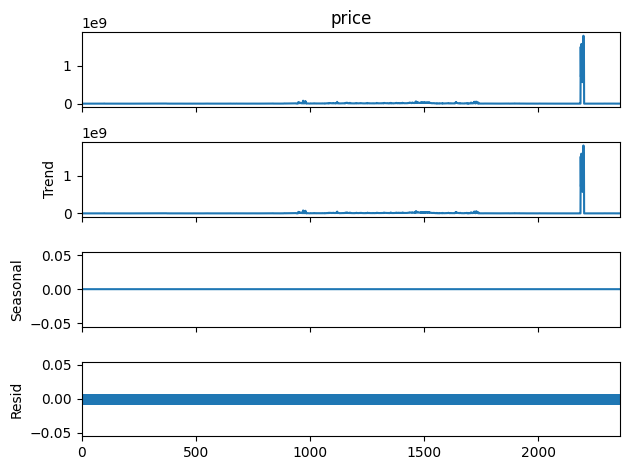

In [18]:
result = seasonal_decompose(df2['price'], model='additive', period=1) 
result.plot()
plt.show()

In [19]:
print('From the above graph, we can see that the price of ethereum peak was at the end of 2022')

From the above graph, we can see that the price of ethereum peak was at the end of 2022


In [20]:
print('The above seasonality shows that the decomposition did not detect any periodic or recurring pattern in your data.')

The above seasonality shows that the decomposition did not detect any periodic or recurring pattern in your data.


In [21]:
# Identify outliers using interquartile range (IQR)
q1 = df2['price'].quantile(0.25)
q3 = df2['price'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df2[(df2['price'] < lower_bound) | (df2['price'] > upper_bound)]

In [22]:
print(outliers)

            date     Open     High      Low    Close       price Currency
949   10/15/2018   197.09   235.83   195.40   214.26    41350788      USD
950   10/16/2018   214.27   218.71   211.37   215.06    20242852      USD
953   10/19/2018   206.60   208.74   204.02   204.97    26320516      USD
956   10/22/2018   207.38   209.39   205.50   206.77    27132436      USD
957   10/23/2018   207.03   207.95   202.99   205.68    19711152      USD
...          ...      ...      ...      ...      ...         ...      ...
2195   3/14/2022  2516.75  2608.68  2500.12  2589.30   991817088      USD
2196   3/15/2022  2589.54  2667.61  2510.75  2617.43  1189507584      USD
2197   3/16/2022  2617.43  2787.12  2603.80  2773.94  1792560768      USD
2198   3/17/2022  2773.80  2832.61  2747.06  2812.29  1058339968      USD
2199   3/18/2022  2812.29  2983.11  2768.65  2939.76  1590928768      USD

[142 rows x 7 columns]


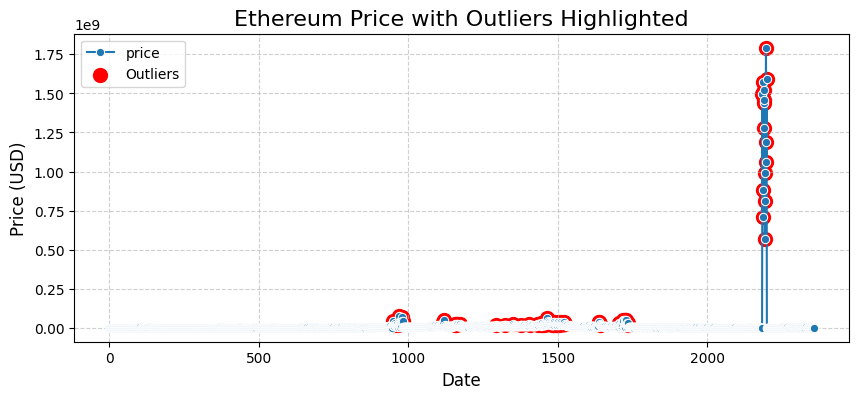

In [23]:
# Plot data with outliers
plt.figure(figsize=(10, 4))
sns.lineplot(x=df2.index, y=df2['price'], label='price', marker='o')
plt.scatter(outliers.index, outliers['price'], color='red', label='Outliers', s=100)

plt.title("Ethereum Price with Outliers Highlighted", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [24]:
print('We have 142 rows in ethereum pice with outliers')

We have 142 rows in ethereum pice with outliers


In [25]:
print('This outliers can be geniune observations that reflect real occurances in ethereum market, removing it may hinder our progress')

This outliers can be geniune observations that reflect real occurances in ethereum market, removing it may hinder our progress


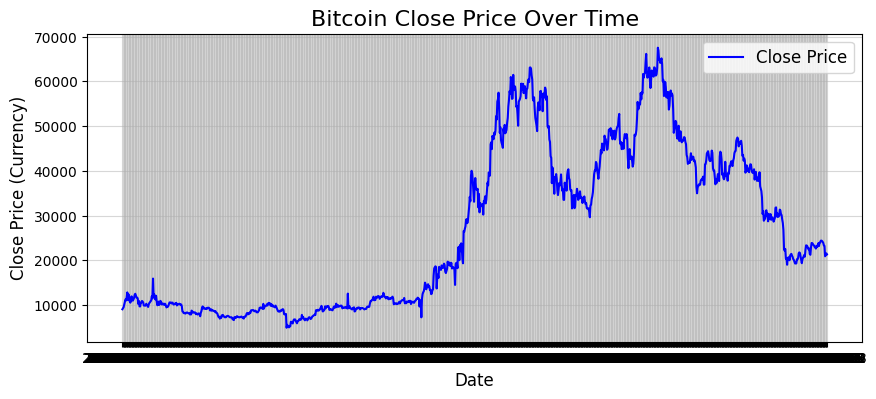

In [26]:
#Visualize the price data over time series to identify trends, seasonality, and potential outliers in bitcoin
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', linewidth=1.5)
plt.title('Bitcoin Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (Currency)', fontsize=12)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.show()

In [27]:
# Identify outliers using interquartile range (IQR)
q1 = df['Close'].quantile(0.25)
q3 = df['Close'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Close'] < lower_bound) | (df['Close'] > upper_bound)]

In [28]:
outliers

,Date,Open,High,Low,Close,Volume,Currency


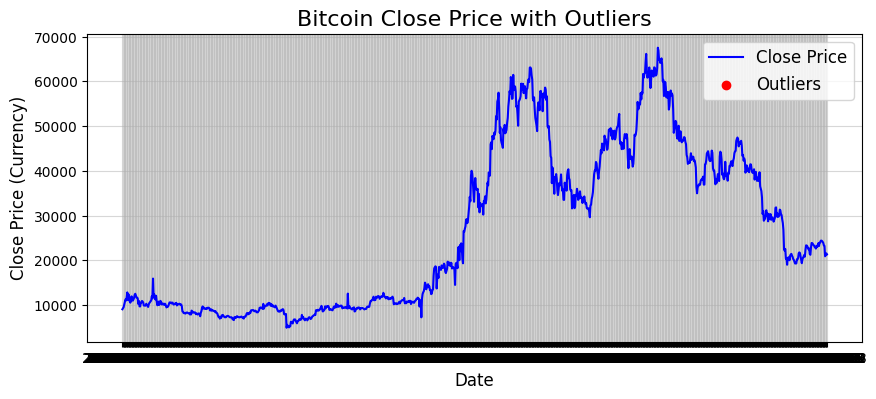

In [29]:
# Plot Close price over time
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', linewidth=1.5)
plt.scatter(outliers['Date'], outliers['Close'], color='red', label='Outliers', zorder=5)
plt.title('Bitcoin Close Price with Outliers', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (Currency)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [30]:
print('There are no outliers present in the bitcoin close price column')

There are no outliers present in the bitcoin close price column


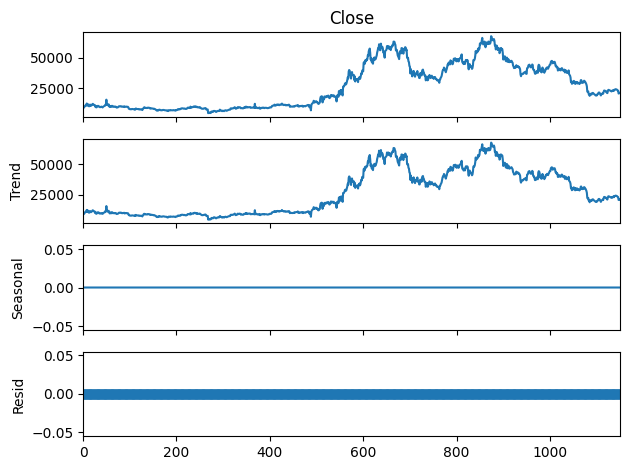

In [31]:
#the seasonality in a 1 year period
result = seasonal_decompose(df['Close'], model='additive', period=1) 
result.plot()
plt.show()

In [32]:
#Identify relevant features for predicting Bitcoin prices.
high_relevance_columns = ['Open', 'High', 'Low','Close','Volume']
preview = df[high_relevance_columns]

In [33]:
preview

,Open,High,Low,Close,Volume
0,9128.269531,9149.763672,8988.606445,9062.045898,952850.0
1,9068.174805,9277.677734,9051.094727,9271.459961,131077.0
2,9271.567383,9573.689453,9209.416992,9519.200195,83052.0
3,9526.833984,10130.935547,9526.833984,10127.998047,76227.0
4,10151.890625,11171.013672,10083.189453,10719.981445,84485.0
...,...,...,...,...,...
1146,23331.542969,23567.285156,23152.455078,23222.242188,4546110.0
1147,23219.097656,23219.097656,20898.304688,20902.404297,13856579.0
1148,20899.923828,21344.845703,20864.435547,21153.019531,7139073.0
1149,21153.412109,21695.794922,21125.320312,21561.177734,6657571.0


In [34]:
#Calculate descriptive statistics for numerical features (mean, median, standard deviation) andanalyze categorical features (frequency distribution)
df.describe()

,Open,High,Low,Close,Volume
count,1151.000000,1151.000000,1151.000000,1151.000000,1.151000e+03
mean,26488.652992,27528.416710,25416.606967,26496.733082,2.874051e+07
std,17963.101635,18432.925246,17484.604545,17952.113609,5.202999e+07
min,4943.832520,5338.512695,0.076853,4936.755371,0.000000e+00
25%,9706.758301,10090.012695,9360.636230,9712.636719,7.495500e+03
50%,20873.337891,21867.822266,20245.201172,20902.404297,1.864334e+06
75%,41782.333984,42749.439453,40890.394531,41782.333984,4.076471e+07
max,67470.437500,85563.984375,66072.343750,67502.421875,5.791706e+08


In [35]:
df2.describe()

,Open,High,Low,Close,price
count,2358.000000,2358.000000,2358.000000,2358.000000,2.358000e+03
mean,847.608083,877.386828,813.515225,848.270513,1.269467e+07
std,1150.297624,1186.544788,1107.868923,1150.261834,1.014013e+08
min,6.680000,7.320000,5.860000,6.700000,0.000000e+00
25%,138.767500,144.417500,134.780000,138.990000,5.465530e+05
50%,279.165000,288.000000,266.885000,280.115000,1.429778e+06
75%,1124.007500,1170.885000,1045.820000,1127.730000,7.717627e+06
max,4808.340000,4864.060000,4715.430000,4808.380000,1.792561e+09


In [36]:
#mean, median, and standard deviation for bitcoin dataset
features_for_mean_median_std = ['Open', 'High', 'Low','Close','Volume']
relevant_mean_median_std = df[features_for_mean_median_std] 
mean = relevant_mean_median_std.mean()
median = relevant_mean_median_std.median()
std = relevant_mean_median_std.std()
print('Mean:', mean)
print('Median:', median)
print('Standard deviation:', std)

Mean: Open      2.648865e+04
High      2.752842e+04
Low       2.541661e+04
Close     2.649673e+04
Volume    2.874051e+07
dtype: float64
Median: Open      2.087334e+04
High      2.186782e+04
Low       2.024520e+04
Close     2.090240e+04
Volume    1.864334e+06
dtype: float64
Standard deviation: Open      1.796310e+04
High      1.843293e+04
Low       1.748460e+04
Close     1.795211e+04
Volume    5.202999e+07
dtype: float64


In [37]:
#mean, median, and standard deviation for ethereum dataset
features_for_mean_median_std = ['Open','High','Low','Close','price']
relevant_mean_median_std = df2[features_for_mean_median_std] 
mean = relevant_mean_median_std.mean()
median = relevant_mean_median_std.median()
std = relevant_mean_median_std.std()
print('Mean:', mean)
print('Median:', median)
print('Standard deviation:', std)

Mean: Open     8.476081e+02
High     8.773868e+02
Low      8.135152e+02
Close    8.482705e+02
price    1.269467e+07
dtype: float64
Median: Open         279.165
High         288.000
Low          266.885
Close        280.115
price    1429778.500
dtype: float64
Standard deviation: Open     1.150298e+03
High     1.186545e+03
Low      1.107869e+03
Close    1.150262e+03
price    1.014013e+08
dtype: float64


In [38]:
# Frequency distribution for categorical features e.g currency, for bitcoin dataset
categorical_feature = ['Currency']
frequency_distribution = df[categorical_feature].value_counts()
print(frequency_distribution)

Currency
USD         1151
Name: count, dtype: int64


In [39]:
# Frequency distribution for categorical features e.g currency, for ethereum dataset
categorical_feature = ['Currency']
frequency_distribution = df2[categorical_feature].value_counts()
print(frequency_distribution)

Currency
USD         2358
Name: count, dtype: int64


In [40]:
#Define the target variable as the future Bitcoin and Ethereum prices (e.g., closing price in the next time window).
#I can use shift() to create a new column with the future price for each row.
df['Future_Close'] = df['Close'].shift(-1)
df2['Future_Close'] = df2['Close'].shift(-1)


In [41]:
df

,Date,Open,High,Low,Close,Volume,Currency,Future_Close
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,USD,9271.459961
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,USD,9519.200195
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,USD,10127.998047
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,USD,10719.981445
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,USD,11246.518555
...,...,...,...,...,...,...,...,...
1146,2022-08-18,23331.542969,23567.285156,23152.455078,23222.242188,4546110.0,USD,20902.404297
1147,2022-08-19,23219.097656,23219.097656,20898.304688,20902.404297,13856579.0,USD,21153.019531
1148,2022-08-20,20899.923828,21344.845703,20864.435547,21153.019531,7139073.0,USD,21561.177734
1149,2022-08-21,21153.412109,21695.794922,21125.320312,21561.177734,6657571.0,USD,21303.986328


In [42]:
df2

,date,Open,High,Low,Close,price,Currency,Future_Close
0,3/10/2016,11.20,11.85,11.07,11.75,4,USD,11.95
1,3/11/2016,11.75,11.95,11.75,11.95,179,USD,12.92
2,3/12/2016,11.95,13.45,11.95,12.92,833,USD,15.07
3,3/13/2016,12.92,15.07,12.92,15.07,1295,USD,12.50
4,3/14/2016,15.07,15.07,11.40,12.50,92183,USD,13.06
...,...,...,...,...,...,...,...,...
2353,8/19/2022,1846.52,1846.97,1607.60,1609.48,1594321,USD,1575.60
2354,8/20/2022,1609.01,1654.84,1525.51,1575.60,1007240,USD,1618.25
2355,8/21/2022,1575.61,1644.88,1563.92,1618.25,852071,USD,1626.75
2356,8/22/2022,1618.21,1627.13,1531.91,1626.75,1044290,USD,1623.24


In [43]:
#we have a empty row value. we need to clean it
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Currency        0
Future_Close    1
dtype: int64

In [44]:
df2.isnull().sum()

date            0
Open            0
High            0
Low             0
Close           0
price           0
Currency        0
Future_Close    1
dtype: int64

In [45]:
#we will add the diffrence of the original close price into the last future close price
#e.g close[row 1150] - close[row 1149] = 258. future_close[row 1150]=21303.986328 + 258
df['Future_Close'] = df['Future_Close'].fillna(21561.986328)

In [46]:
print(df[['Date', 'Currency', 'Close', 'Future_Close']].tail())

            Date Currency         Close  Future_Close
1146  2022-08-18      USD  23222.242188  20902.404297
1147  2022-08-19      USD  20902.404297  21153.019531
1148  2022-08-20      USD  21153.019531  21561.177734
1149  2022-08-21      USD  21561.177734  21303.986328
1150  2022-08-23      USD  21303.986328  21561.986328


In [47]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Currency        0
Future_Close    0
dtype: int64

In [48]:
df2['Future_Close'] = df2['Future_Close'].fillna(1626.75)

In [49]:
df2.isnull().sum()

date            0
Open            0
High            0
Low             0
Close           0
price           0
Currency        0
Future_Close    0
dtype: int64

In [50]:
#Select relevant features based on the exploration phase. e.g  (price change, price spread).
df['Price_Change'] = df['Close'] - df['Open']
df2['Price_Change'] = df2['Close'] - df2['Open']

In [51]:
df['Price_Spread'] = df['High'] - df['Low']
df2['Price_Spread'] = df2['High'] - df2['Low']

In [52]:
#The percentage change between the Close price of one period and the previous period
df['Price_Return'] = df['Close'].pct_change()
df2['Price_Return'] = df2['Close'].pct_change()

In [53]:
#Scale the features to a common range to improve model performance
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [54]:
scaler = StandardScaler()

In [55]:
feature_columns = ['Price_Change', 'Price_Spread', 'Price_Return']
df[feature_columns] = scaler.fit_transform(df[feature_columns])
print(df[feature_columns].head())

   Price_Change  Price_Spread  Price_Return
0     -0.054713     -0.522275           NaN
1      0.143737     -0.504758      0.380870
2      0.176392     -0.467892      0.446709
3      0.436710     -0.403679      1.125438
4      0.412357     -0.274166      1.025097


In [56]:
#scaling features in the ethereum dataset
feature_columns = ['Price_Change', 'Price_Spread', 'Price_Return']
df2[feature_columns] = scaler.fit_transform(df2[feature_columns])
print(df2[feature_columns].head())

   Price_Change  Price_Spread  Price_Return
0     -0.001603     -0.621299           NaN
1     -0.006592     -0.627010      0.238023
2      0.004384     -0.614208      1.381951
3      0.021204     -0.607808      2.901899
4     -0.046076     -0.592839     -3.106524


In [57]:
df

,Date,Open,High,Low,Close,Volume,Currency,Future_Close,Price_Change,Price_Spread,Price_Return
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,USD,9271.459961,-0.054713,-0.522275,NaN
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,USD,9519.200195,0.143737,-0.504758,0.380870
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,USD,10127.998047,0.176392,-0.467892,0.446709
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,USD,10719.981445,0.436710,-0.403679,1.125438
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,USD,11246.518555,0.412357,-0.274166,1.025097
...,...,...,...,...,...,...,...,...,...,...,...
1146,2022-08-18,23331.542969,23567.285156,23152.455078,23222.242188,4546110.0,USD,20902.404297,-0.086432,-0.454356,-0.122132
1147,2022-08-19,23219.097656,23219.097656,20898.304688,20902.404297,13856579.0,USD,21153.019531,-1.711820,0.055954,-1.861376
1148,2022-08-20,20899.923828,21344.845703,20864.435547,21153.019531,7139073.0,USD,21561.177734,0.180414,-0.436797,0.178183
1149,2022-08-21,21153.412109,21695.794922,21125.320312,21561.177734,6657571.0,USD,21303.986328,0.294304,-0.412683,0.311357


In [58]:
df2

,date,Open,High,Low,Close,price,Currency,Future_Close,Price_Change,Price_Spread,Price_Return
0,3/10/2016,11.20,11.85,11.07,11.75,4,USD,11.95,-0.001603,-0.621299,NaN
1,3/11/2016,11.75,11.95,11.75,11.95,179,USD,12.92,-0.006592,-0.627010,0.238023
2,3/12/2016,11.95,13.45,11.95,12.92,833,USD,15.07,0.004384,-0.614208,1.381951
3,3/13/2016,12.92,15.07,12.92,15.07,1295,USD,12.50,0.021204,-0.607808,2.901899
4,3/14/2016,15.07,15.07,11.40,12.50,92183,USD,13.06,-0.046076,-0.592839,-3.106524
...,...,...,...,...,...,...,...,...,...,...,...
2353,8/19/2022,1846.52,1846.97,1607.60,1609.48,1594321,USD,1575.60,-3.388294,1.728232,-2.354531
2354,8/20/2022,1609.01,1654.84,1525.51,1575.60,1007240,USD,1618.25,-0.485680,0.644606,-0.440869
2355,8/21/2022,1575.61,1644.88,1563.92,1618.25,852071,USD,1626.75,0.598363,0.168279,0.417195
2356,8/22/2022,1618.21,1627.13,1531.91,1626.75,1044290,USD,1623.24,0.112290,0.308705,0.028164


In [59]:
scaler = MinMaxScaler()

In [60]:
df[feature_columns] = scaler.fit_transform(df[feature_columns])

In [61]:
print(df[feature_columns].head())

   Price_Change  Price_Spread  Price_Return
0      0.476445      0.001094           NaN
1      0.495890      0.001873      0.425304
2      0.499090      0.003515      0.429079
3      0.524597      0.006373      0.467995
4      0.522211      0.012140      0.462242


In [62]:
df2[feature_columns] = scaler.fit_transform(df2[feature_columns])

In [63]:
print(df2[feature_columns].head())

   Price_Change  Price_Spread  Price_Return
0      0.633289      0.000516           NaN
1      0.633053      0.000132      0.624496
2      0.633572      0.000992      0.711117
3      0.634366      0.001422      0.826211
4      0.631189      0.002428      0.371239


In [64]:
#implementent feature selection method. 1. Filter methods:
#correlation matrix
high_relevance_columns = ['Open','High','Low','Close','Volume','Future_Close']
preview = df[high_relevance_columns]
correlation_matrix = preview.corr()

In [65]:
target_correlation = correlation_matrix['Future_Close'].sort_values(ascending=False)
print("Feature correlations with the target variable (Future_Close):")
print(target_correlation)

Feature correlations with the target variable (Future_Close):
Future_Close    1.000000
Close           0.997154
Open            0.994890
Low             0.990721
High            0.985112
Volume          0.595051
Name: Future_Close, dtype: float64


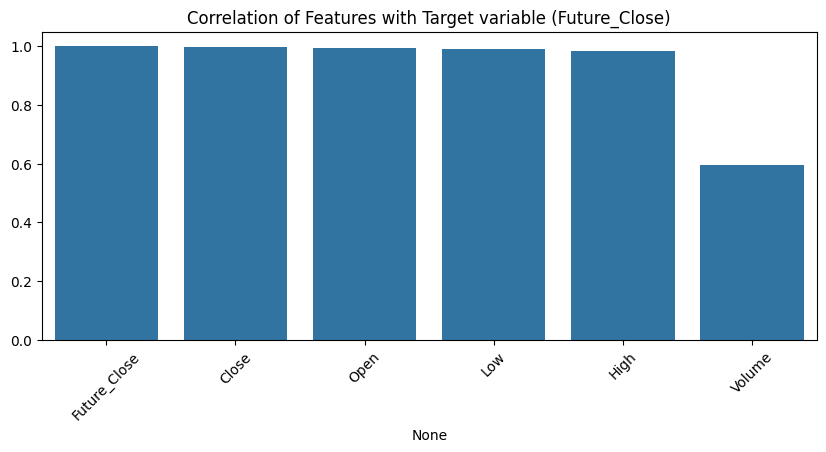

In [66]:
#Visualize of correlation of features
plt.figure(figsize=(10, 4))
sns.barplot(x=target_correlation.index, y=target_correlation.values)
plt.title("Correlation of Features with Target variable (Future_Close)")
plt.xticks(rotation=45)
plt.show()


In [67]:
high_relevance_columns = ['Open', 'High', 'Low','Close','price','Future_Close']
preview = df2[high_relevance_columns]
correlation_matrix = preview.corr()

In [68]:
target_correlation = correlation_matrix['Future_Close'].sort_values(ascending=False)
print("Feature correlations with the target variable (Future_Close):")
print(target_correlation)

Feature correlations with the target variable (Future_Close):
Future_Close    1.000000
Close           0.998139
High            0.997408
Low             0.997164
Open            0.996575
price           0.102441
Name: Future_Close, dtype: float64


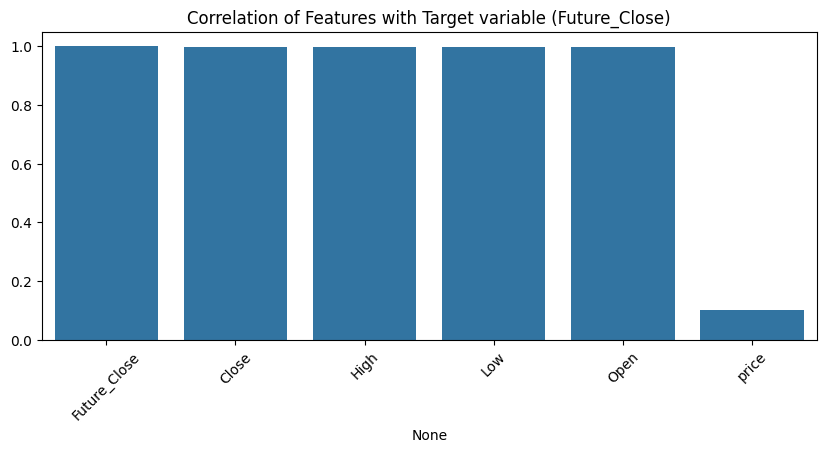

In [69]:
plt.figure(figsize=(10, 4))
sns.barplot(x=target_correlation.index, y=target_correlation.values)
plt.title("Correlation of Features with Target variable (Future_Close)")
plt.xticks(rotation=45)
plt.show()

In [70]:
#mutual info can be used for continuous variables to measure the dependence between features and the target variable.
from sklearn.feature_selection import mutual_info_regression
# X is the features and y is the target variable
high_relevance_columns = ['Open','High','Low','Close','Volume','Future_Close']
preview = df[high_relevance_columns]
X = preview.drop('Future_Close', axis=1)
y = preview['Future_Close']


In [71]:
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns)
print(mi_series)

Open      2.178671
High      2.243375
Low       2.256409
Close     2.464932
Volume    0.806202
dtype: float64


In [72]:
print('Features with higher mutual information are more relevant for prediction.')

Features with higher mutual information are more relevant for prediction.


In [73]:
high_relevance_columns = ['Open', 'High', 'Low','Close','price','Future_Close']
preview = df2[high_relevance_columns]
X = preview.drop('Future_Close', axis=1)
y = preview['Future_Close']


In [74]:
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns)
print(mi_series)

Open     2.834978
High     3.030271
Low      2.986342
Close    3.172113
price    0.810193
dtype: float64


In [75]:
#implementent feature selection method. 2. Wrapper methods:
#i will use RFE to remove the least important features one by one based on model performance.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [76]:
high_relevance_columns = ['Open','High','Low','Close','Volume','Future_Close']
preview = df[high_relevance_columns]
X = preview.drop('Future_Close', axis=1) 
y = preview['Future_Close']  


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
model = LinearRegression()

In [79]:
selector = RFE(estimator=model, n_features_to_select=5)  # i choose 5 features 
selector = selector.fit(X_train, y_train)

In [80]:
selected_features = X.columns[selector.support_]
print(f"Selected features: {selected_features}")

Selected features: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [81]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model.fit(X_train_selected, y_train)

LinearRegression()

In [82]:
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")
print(f"Mean Squared Error: {mse}")

R2: 0.9951049665076825
Mean Squared Error: 1525909.0250748675


In [83]:
print('I have a mse of 1.5 million when selecting 5 features, i will redo it to 4 features excluding volume column')

I have a mse of 1.5 million when selecting 5 features, i will redo it to 4 features excluding volume column


In [84]:
high_relevance_columns = ['Open','High','Low','Close','Future_Close']
preview = df[high_relevance_columns]
X = preview.drop('Future_Close', axis=1) 
y = preview['Future_Close']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
model = LinearRegression()

In [86]:
selector = RFE(estimator=model, n_features_to_select=4) 
selector = selector.fit(X_train, y_train)

In [87]:
selected_features = X.columns[selector.support_]
print(f"Selected features: {selected_features}")

Selected features: Index(['Open', 'High', 'Low', 'Close'], dtype='object')


In [88]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model.fit(X_train_selected, y_train)

LinearRegression()

In [89]:
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")
print(f"Mean Squared Error: {mse}")

R2: 0.9951015876848832
Mean Squared Error: 1526962.2918628803


In [90]:
print('Not much difference after removing volume. For the prediction of bitcoin prices. open, high low, close are already high relevance features')

Not much difference after removing volume. For the prediction of bitcoin prices. open, high low, close are already high relevance features


In [91]:
#I will use RFECV to automate the process of selecting the optimal number of features
from sklearn.feature_selection import RFECV


In [92]:
high_relevance_columns = ['Open','High','Low','Close','Volume','Future_Close']
preview = df[high_relevance_columns]
X = preview.drop('Future_Close', axis=1) 
y = preview['Future_Close']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
selector = RFE(estimator=model, n_features_to_select=5)  
selector = selector.fit(X_train, y_train)
selected_features = X.columns[selector.support_]
print(f"Selected features: {selected_features}")
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")
print(f"Mean Squared Error: {mse}")

Selected features: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
R2: 0.9951049665076825
Mean Squared Error: 1525909.0250748675


In [93]:
#Using RFECV Now
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv = rfecv.fit(X_train, y_train)


selected_features = X.columns[rfecv.support_]
print(f"Selected features: {selected_features}")


Selected features: Index(['Open', 'Close'], dtype='object')


In [94]:
# Training the model with the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")
print(f"Mean Squared Error: {mse}")


R2: 0.9950806874786295
Mean Squared Error: 1533477.428766134


In [95]:
print('Open and Close columns are the subset columns that minimizes the model error ')

Open and Close columns are the subset columns that minimizes the model error 


In [96]:
#i will redo RFE to compare the mse and r2 score of RFECV using RFE open and close column

In [97]:
high_relevance_columns = ['Open','Close','Future_Close']
preview = df[high_relevance_columns]
X = preview.drop('Future_Close', axis=1) 
y = preview['Future_Close']  

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
model = LinearRegression()

In [100]:
selector = RFE(estimator=model, n_features_to_select=2)  # i choose 2 features 
selector = selector.fit(X_train, y_train)

In [101]:
selected_features = X.columns[selector.support_]
print(f"Selected features: {selected_features}")

Selected features: Index(['Open', 'Close'], dtype='object')


In [102]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")
print(f"Mean Squared Error: {mse}")


R2: 0.9950806874786295
Mean Squared Error: 1533477.428766134


In [103]:
print('Using RFE and RFECV open and close is the subset of the relevant feature for prediction')

Using RFE and RFECV open and close is the subset of the relevant feature for prediction


In [104]:
#implementent feature selection method. 3. Embedded methods:
#using Lasso regression in creating simpler, more interpretable models by selecting only the most important features.
from sklearn.linear_model import Lasso

In [105]:
high_relevance_columns = ['Open','High','Low','Close','Volume','Future_Close']
preview = df[high_relevance_columns]
X = preview.drop('Future_Close', axis=1) 
y = preview['Future_Close']  

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [107]:
lasso = Lasso(alpha=0.1)  

In [108]:
lasso.fit(X_train, y_train)

C:\Users\ACER\AppData\Local\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.648e+08, tolerance: 2.981e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [109]:
coefficients = lasso.coef_
selected_features = X.columns[coefficients != 0]
print(f"Selected features: {selected_features}")

Selected features: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [110]:
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")
print(f"Mean Squared Error: {mse}")

R2: 0.9950891865250769
Mean Squared Error: 1530828.0553350975


In [111]:
#Compare the results of different feature selection methods and choose the most relevant features for further modelling.
print('The lower the MSE, and the higher the R-squared, the better the feature selection method and the resulting model.')

The lower the MSE, and the higher the R-squared, the better the feature selection method and the resulting model.


In [112]:
#Implement Random Forest, Regression, and KNN models for Bitcoin price prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [113]:
high_relevance_columns = ['Open','High','Low','Close','Volume','Future_Close']
preview = df[high_relevance_columns]
X = preview.drop('Future_Close', axis=1)  
y = preview['Future_Close'] 

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [115]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest Performance:")
print("Mean Squared Error (MSE):", rf_mse)
print("R-squared:", rf_r2)

Random Forest Performance:
Mean Squared Error (MSE): 1903738.2199296707
R-squared: 0.9938929109179997


In [116]:
#Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Linear Regression Performance:")
print("Mean Squared Error (MSE):", lr_mse)
print("R-squared:", lr_r2)

Linear Regression Performance:
Mean Squared Error (MSE): 1525909.0250748675
R-squared: 0.9951049665076825


In [117]:
# KNN Regressor Model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
print("KNN Regressor Performance:")
print("Mean Squared Error (MSE):", knn_mse)
print("R-squared:", knn_r2)

KNN Regressor Performance:
Mean Squared Error (MSE): 62216171.7072483
R-squared: 0.8004138914796648


In [118]:
#Evaluate the performance of each model on the testing set using Root Mean Squared Error (RMSE)
rf_rmse = rf_mse ** 0.5
rf_rmse

np.float64(1379.760203778059)

In [119]:
lr_rmse = lr_mse ** 0.5
lr_rmse

np.float64(1235.2769021862537)

In [120]:
knn_rmse = knn_mse ** 0.5
knn_rmse

np.float64(7887.722846756743)

In [121]:
rmse_results = {"Random Forest": rf_rmse, "Linear Regression": lr_rmse,"KNN Regressor": knn_rmse}
# Print the model with the lowest RMSE
best_model = min(rmse_results, key=rmse_results.get)
print("Model Comparison:")
for model, rmse in rmse_results.items():
    print(f"{model}: RMSE = {rmse:.2f}")
print(f"\nThe best model is: {best_model} with RMSE = {rmse_results[best_model]:.2f}")

Model Comparison:
Random Forest: RMSE = 1379.76
Linear Regression: RMSE = 1235.28
KNN Regressor: RMSE = 7887.72

The best model is: Linear Regression with RMSE = 1235.28


In [122]:
print('The model with the lowest RMSE is chosen as the best model for optimal price prediction. Which is Linear regression')

The model with the lowest RMSE is chosen as the best model for optimal price prediction. Which is Linear regression


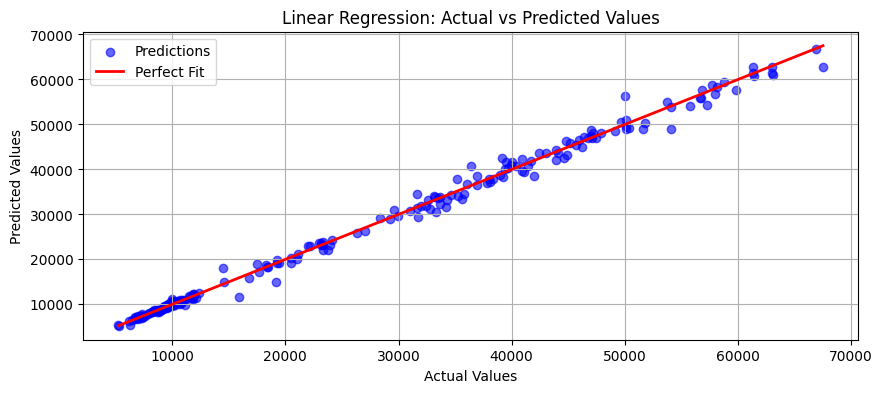

In [123]:
# Scatter plot of linear regression
plt.figure(figsize=(10, 4))
plt.scatter(y_test, lr_predictions, alpha=0.6, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, label="Perfect Fit")
plt.title("Linear Regression: Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

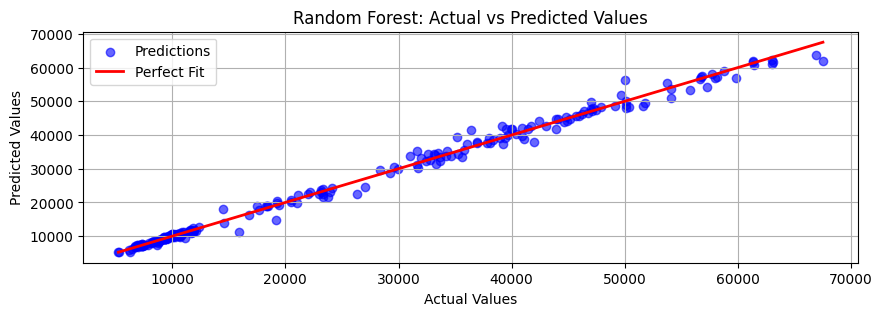

In [124]:
# Random Forest Visualization
plt.figure(figsize=(10, 3))
plt.scatter(y_test, rf_predictions, alpha=0.6, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, label="Perfect Fit")
plt.title("Random Forest: Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

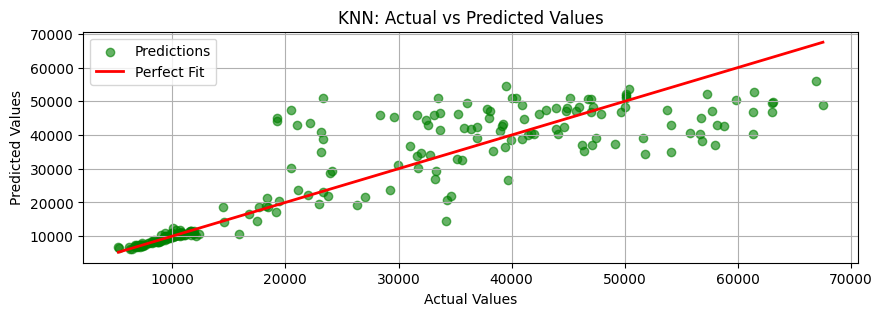

In [128]:
# KNN Visualization
plt.figure(figsize=(10, 3))
plt.scatter(y_test, knn_predictions, alpha=0.6, color="green", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, label="Perfect Fit")
plt.title("KNN: Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

In [126]:
print('From the above graphs linear regression has a tighter clustering along the diagonal line, which indicates a better-performing model')

From the above graphs linear regression has a tighter clustering along the diagonal line, which indicates a better-performing model
